In [1]:
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
from astropy.units import imperial
import numpy as np

imperial.enable();

# Model black body

* Our code is consistent with https://spectralcalc.com/blackbody_calculator/blackbody.php
* Use the equation from here: https://en.wikipedia.org/wiki/Planck%27s_law

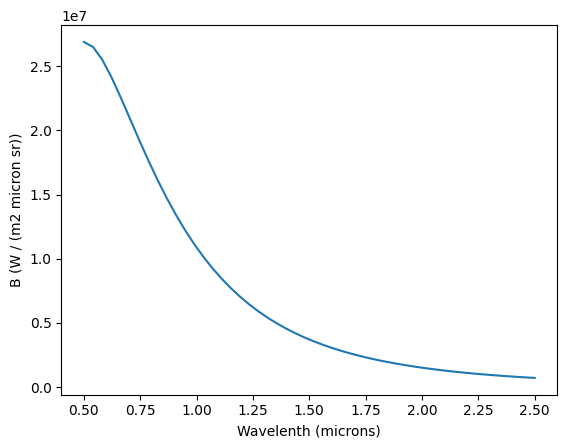

In [2]:
T = 5800 * u.K # Using the approximate temperature of the sun
llambda = (np.linspace(500, 2500) * u.nm).to(u.meter)
v = const.c/llambda
h = const.h
c = const.c
k = const.k_B

B = (2 * h * c**2)/llambda**5 * 1/(np.exp(h*c/(llambda*k*T)) - 1)
spectral_radiance = B.to(u.W / (u.meter**2 * u.micron))
spectral_radiance = spectral_radiance/u.sr

plt.plot(llambda.to(u.micron), spectral_radiance)
plt.xlabel('Wavelenth (microns)')
plt.ylabel('B ({})'.format(spectral_radiance._unit))
plt.show()

## Fraction of the sky that is the sun
* On average, solid angle of the sun is 6.794e-5 steradians https://en.wikipedia.org/wiki/Solid_angle#:~:text=By%20inputting%20the%20appropriate%20average,6.418%C3%9710%E2%88%925%20steradians
* Half a sphere is 2pi steradians

In [3]:
frac_sun = 6.794e-5/(2*np.pi)
loss_factor = 0.5 # E.g. from atmosphere

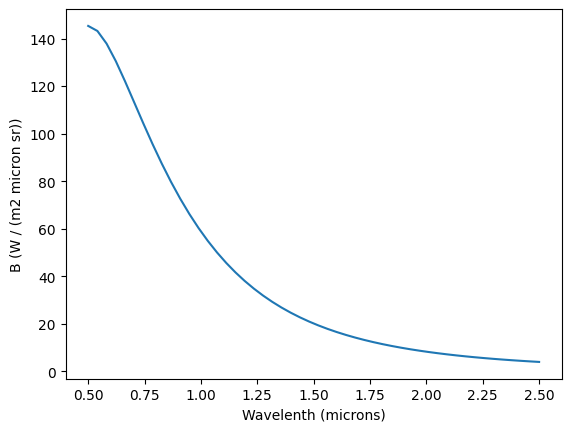

In [4]:
spectral_radiance_received = spectral_radiance * frac_sun * loss_factor

plt.plot(llambda.to(u.micron), spectral_radiance_received)
plt.xlabel('Wavelenth (microns)')
plt.ylabel('B ({})'.format(spectral_radiance._unit))
plt.show()

2pi ster is half the sphere, 

lambertian surface - white wall

angular diameter of the sun - 


radiation field reflected by the white wall, is 

solid angle of sun compared to solid angle of the entire sky, 

* multiply by a half by loss <- can be tweaked
* energy = plancks const x freq <- energy of photon = h v 
* photons come at a particular energy channel, multiply by photons per watt to get photons
* need to know channel width...



## Scale

https://www.simtrum.com/upload/Plupload/File_662/20201208143906776.html

$\Sigma = \pi (NA)^2$

In [18]:
# Values to change

fibre_NA = 0.15 # Fibre numerical aperature
fibre_mode_diameter = 5*u.micron # diameter of the fibre

In [19]:
fibre_core_area = (fibre_NA**2 * np.pi) * u.sr
fibre_mode_radius = (fibre_mode_diameter/2)
mode_field_area = (np.pi*fibre_mode_radius**2).to(u.meter**2)

scaled_spectral_radiance = fibre_core_area * mode_field_area * spectral_radiance_received

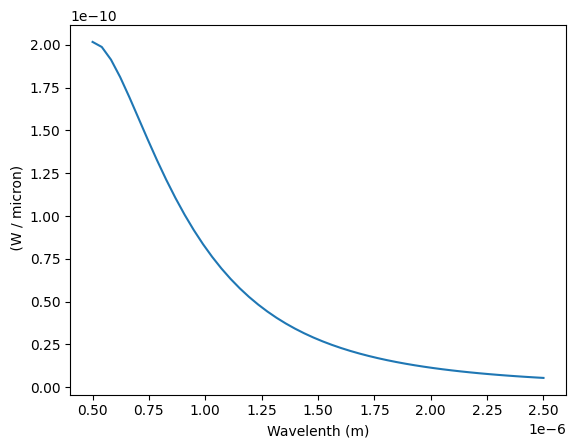

In [20]:
plt.plot(llambda, scaled_spectral_radiance)
plt.xlabel('Wavelenth ({})'.format(llambda._unit))
plt.ylabel(' ({})'.format(scaled_spectral_radiance._unit))
plt.show()

## Convert to photons

In [22]:
llambda[1] - llambda[0]

<Quantity 4.08163265e-08 m>

convert both sides to frequency
-> find delta freq
-> get photons per herts, from reading the chart W/microns
-> watts per hertz -> one per hertz is photons per second
-> one per hertz disappears from width of the channel


noise: draw from poisson dist
* photons per s from sun

-> calibrate gas in line of site
- pressure of gas, know how much there is, 
- line strength list -> 
- data from interwebs 